In [138]:
#from google.colab import drive
#drive.mount('/content/drive')

In [139]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [140]:
df = pd.read_csv('/content/drive/MyDrive/CS 4330/NCHS_-_Leading_Causes_of_Death__United_States.csv')

# (1) Identify numerical and categorical features in your dataset and list them out with their ranges and category values.




In [141]:
min_value = df['Year'].min()
max_value = df['Year'].max()
print("Year range")
print(min_value)
print(max_value)

min_value = df['Deaths'].min()
max_value = df['Deaths'].max()
print("Deaths range")
print(min_value)
print(max_value)

min_value = df['Age-adjusted Death Rate'].min()
max_value = df['Age-adjusted Death Rate'].max()
print("Age Adjusted Death Rate range")
print(min_value)
print(max_value)

Year range
1999
2017
Deaths range
21
2813503
Age Adjusted Death Rate range
2.6
1087.3




Numerical Features:
1.   Year: 1999-2017
2.   Deaths: 21-2813503
3.   Age-adjusted Death Rate: 2.6-1087.3

Categorical Features:
*   113 Cause Name: Accidents (unintentional injuries) (V01-X59,Y85-Y86), All Causes, Alzheimer's disease (G30), Cerebrovascular diseases (I60-I69), Chronic lower respiratory diseases (J40-J47), Diabetes mellitus (E10-E14), Diseases of heart (I00-I09,I11,I13,I20-I51), Influenza and pneumonia (J09-J18), Intentional self-harm (suicide) (*U03,X60-X84,Y87.0), Malignant neoplasms (C00-C97) ,Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27).
*   Cause Name: Unintentional Injuries, all causes, Alzheimer's disease, stroke, CLRD, Diabetes, Heart Disease, Influenza and pneumonia, Suicide, Cancer, Kidney disease.
*   State: Unites States, (All 50 states)s







#  (2) Show an example of each of the following single feature plots on your dataset. Explain the results of each plot briefly.

Makes a dataframe that takes all the "All causes" from each year that is not the United States and makes a dataframe that is the mean of all the states Age-adjusted Death Rate.

<Axes: xlabel='Age-adjusted Death Rate', ylabel='Count'>

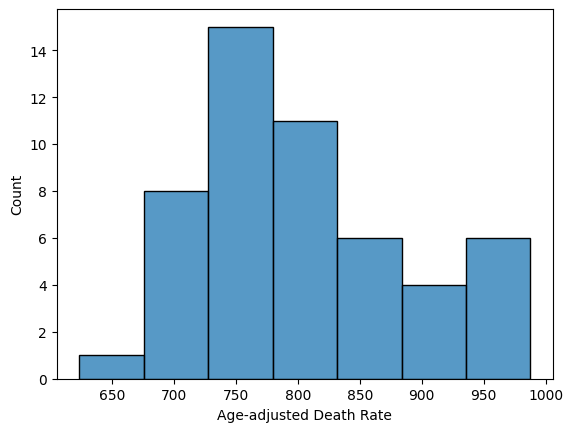

In [142]:
allCausesDf = df[(df["Cause Name"] == "All causes") & (df["State"] != "United States")]
state_means = allCausesDf.groupby("State")["Age-adjusted Death Rate"].mean().reset_index()
state_means.to_csv("state_age_adjusted_death_rate_means.csv", index=False)
sns.histplot(state_means, x='Age-adjusted Death Rate')


This shows us that the most common Age-adjusted Death Rate for the US is around 750.

Makes a kdeplot plot based on a dataframe that holds the mean of age-adjusted deathrates from the last 18 years in each state.

<Axes: xlabel='Age-adjusted Death Rate', ylabel='Density'>

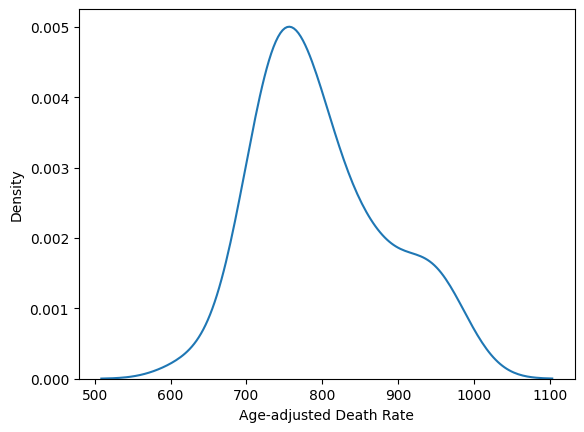

In [143]:
sns.kdeplot(state_means, x='Age-adjusted Death Rate')

This shows us a rough trend line from the means of each state.

This makes a countplot from our state_means table

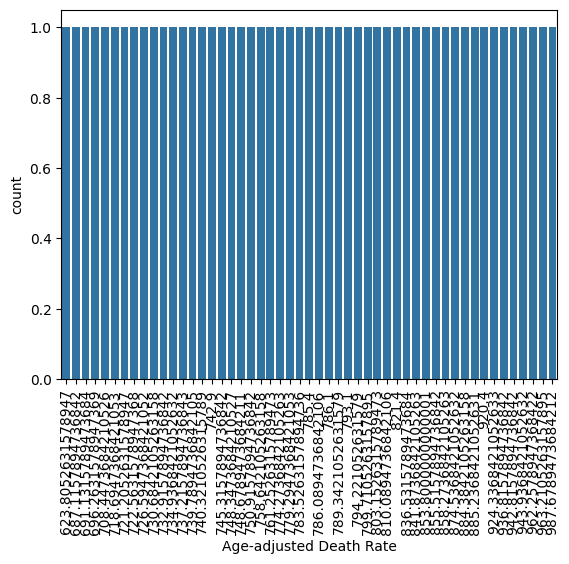

In [144]:
sns.countplot(state_means, x='Age-adjusted Death Rate')
plt.xticks(rotation=90)
plt.show()

This shows us nothing as all of our data is complete with numerical numbers

This makes a boxplot based on our state_means database.

<Axes: xlabel='Age-adjusted Death Rate'>

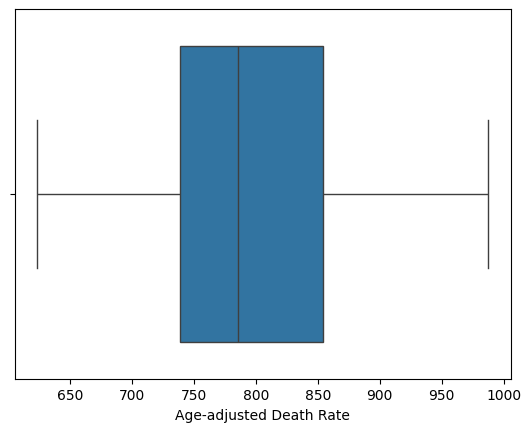

In [145]:
sns.boxplot(state_means, x='Age-adjusted Death Rate')

This show us that there is no outliers. It also shows us our mean is around 775.

This code makes a violin plot with the state_means database

<Axes: xlabel='Age-adjusted Death Rate'>

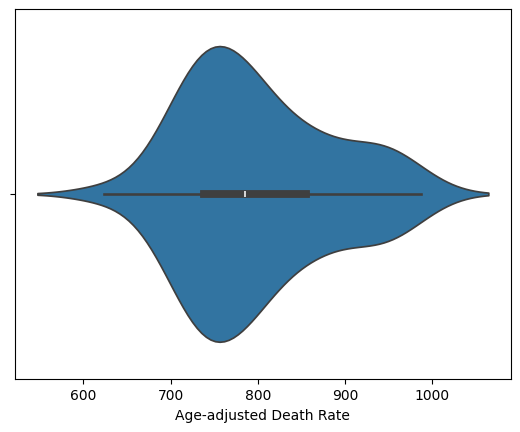

In [146]:
sns.violinplot(state_means, x='Age-adjusted Death Rate')

This also shows us that our more dence part is in between 700 and 800 and also that it is right scewed.

# (3) Show an example of each of the following two feature plots on the dataset.Use hue, style, and size parameters as well. Explain the results of each plot briefly.

This code creates a scatter plot with the state_means data frame with state and age-adjusted death rate as features

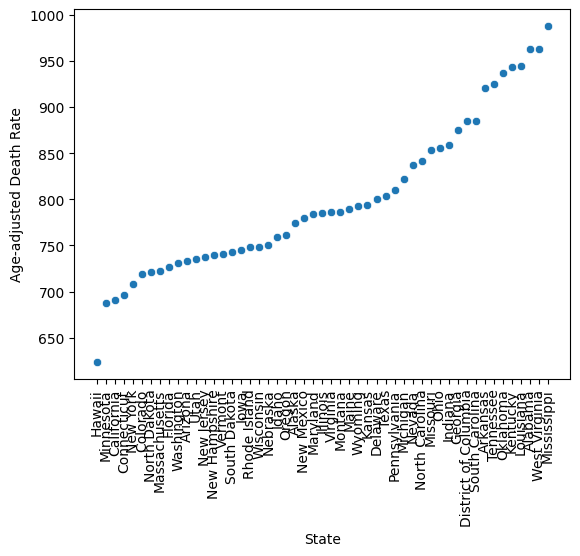

In [147]:
sns.scatterplot(state_means.sort_values(by="Age-adjusted Death Rate"), x='State', y='Age-adjusted Death Rate')
plt.xticks(rotation=90)
plt.show()

This scatterplot shows the age-adjusted death rate for every cause per state. The state represents the dot and there death rate per cause

This code creates a strip plot plot with the state_means data frame with state and age-adjusted death rate as features

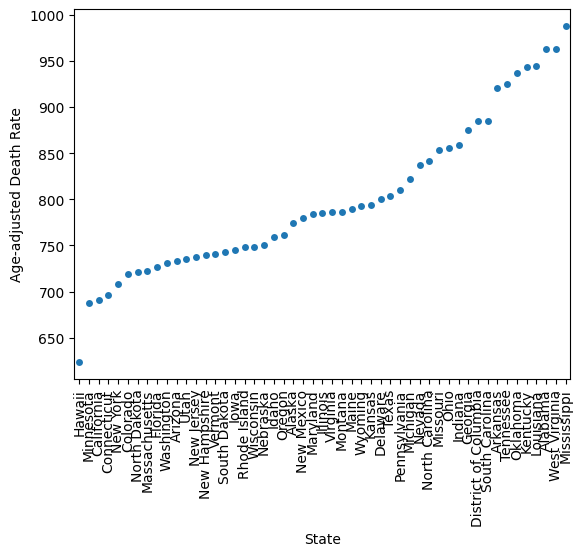

In [148]:
sns.stripplot(state_means.sort_values(by="Age-adjusted Death Rate"), x='State', y='Age-adjusted Death Rate')
plt.xticks(rotation=90)
plt.show()

This strip plot shows the age-adjusted death rate for every cause per state. The state represents the dot and there death rate per cause

This code creates a swarm plot with the state_means data frame with state and age-adjusted death rate as features

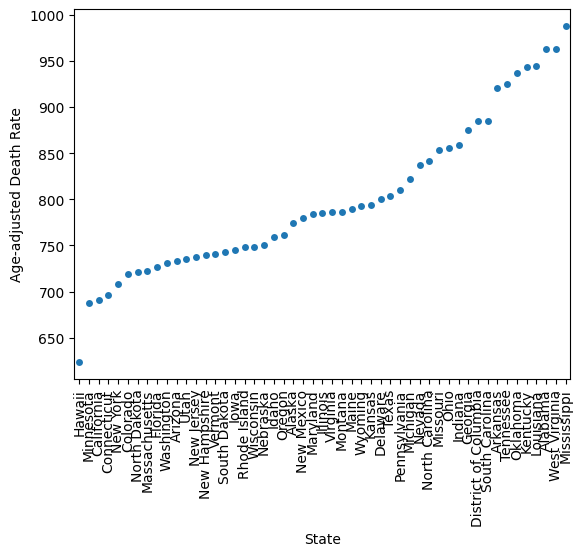

In [149]:
sns.swarmplot(state_means.sort_values(by="Age-adjusted Death Rate"), x='State', y='Age-adjusted Death Rate')
plt.xticks(rotation=90)
plt.show()

This swarm plot shows the age-adjusted death rate for every cause per state. The state represents the dot and there death rate per cause

# (4) Summarize the dataset using the following methods.

In [150]:
df.shape

(10868, 6)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     10868 non-null  int64  
 1   113 Cause Name           10868 non-null  object 
 2   Cause Name               10868 non-null  object 
 3   State                    10868 non-null  object 
 4   Deaths                   10868 non-null  int64  
 5   Age-adjusted Death Rate  10868 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 509.6+ KB


In [152]:
df.describe(include='all')

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
count,10868.000000,10868,10868,10868,1.086800e+04,10868.000000
unique,NaN,11,11,52,NaN,NaN
top,NaN,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,NaN,NaN
freq,NaN,988,988,209,NaN,NaN
mean,2008.000000,NaN,NaN,NaN,1.545991e+04,127.563894
std,5.477478,NaN,NaN,NaN,1.128760e+05,223.639771
min,1999.000000,NaN,NaN,NaN,2.100000e+01,2.600000
25%,2003.000000,NaN,NaN,NaN,6.120000e+02,19.200000
50%,2008.000000,NaN,NaN,NaN,1.718500e+03,35.900000
75%,2013.000000,NaN,NaN,NaN,5.756500e+03,151.725000


# (5) Show examples of the following visualization methods on selected dataset columns.Try to interpret the results that are interesting and useful.

Explanation of code piece below: Df.hist() plots histograms for our dataset "df". Histograms show the frequency a numerical data type occurs in the dataset, and although looks like a bar chart, it is very different.

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Deaths'}>],
       [<Axes: title={'center': 'Age-adjusted Death Rate'}>, <Axes: >]],
      dtype=object)

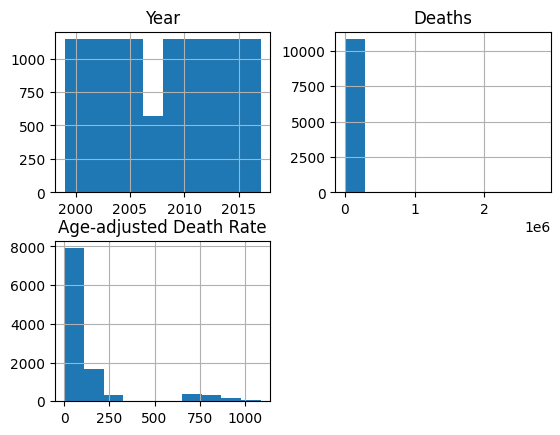

In [153]:
df.hist()

Interpretation of results above: From the code results above, it shows three different histogram plots for year, death, and age-adjusted death rate, which are all numerical value data types. For year, it shows that year 2006 or 2007 shows up about 50% less than any of the other years. This is something to take into consideration while cleaning the data in step six. For death and age adjusted death rates, it seems to point out some outliers in the 750-1000 range, and for deaths, it shows most everything to be between 100-300 range which is considered true but could be narrowed down to be more of an accurate representation after cleaning.

Explanation of code piece below: Df.boxplot()  summarizes the distribution of numerical data types. Typically, it looks like a box with a line coming out of the bottom and a line coming out of the top.

<Axes: >

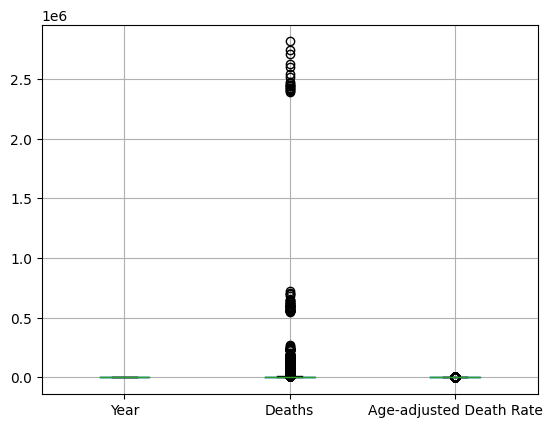

In [154]:
df.boxplot()

Interpretation of results above:  From what it shows, this does not look like an accurate box plot. It shows several dots, whoever there are no boxes on any of the features. This will probably look more like a box plot after cleaning.

Explanation of code piece below: Pd.plotting.scatter_matrix(df) plots every pair of numerical feature, and creates scatter plots for each. So, there should be 9 scatter plots if there are three numerical data types.

array([[<Axes: xlabel='Year', ylabel='Year'>,
        <Axes: xlabel='Deaths', ylabel='Year'>,
        <Axes: xlabel='Age-adjusted Death Rate', ylabel='Year'>],
       [<Axes: xlabel='Year', ylabel='Deaths'>,
        <Axes: xlabel='Deaths', ylabel='Deaths'>,
        <Axes: xlabel='Age-adjusted Death Rate', ylabel='Deaths'>],
       [<Axes: xlabel='Year', ylabel='Age-adjusted Death Rate'>,
        <Axes: xlabel='Deaths', ylabel='Age-adjusted Death Rate'>,
        <Axes: xlabel='Age-adjusted Death Rate', ylabel='Age-adjusted Death Rate'>]],
      dtype=object)

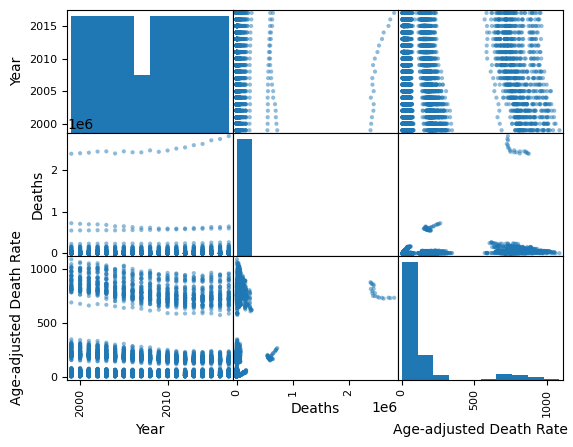

In [155]:
pd.plotting.scatter_matrix(df)

Interpretation of results above: From the code execution we can see that there are 9 graphs, 3 of which are histograms, and the other 6 are scatter plots. We have already seen the histograms from earlier, and we can assume these are histograms because they are comparing that feature to the same feature. The others are scatterplots based on the x and y values at the graph.

#  (6) Try to find outliers in the dataset such as the following,show examples, and show how you are cleaning them.

In [156]:
df.drop_duplicates()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8
...,...,...,...,...,...,...
10863,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Virginia,1035,16.9
10864,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Washington,278,5.2
10865,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,West Virginia,345,16.4
10866,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Wisconsin,677,11.9


In [157]:
df.dropna()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8
...,...,...,...,...,...,...
10863,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Virginia,1035,16.9
10864,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Washington,278,5.2
10865,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,West Virginia,345,16.4
10866,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Wisconsin,677,11.9


In [158]:
df.isnull()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
10863,False,False,False,False,False,False
10864,False,False,False,False,False,False
10865,False,False,False,False,False,False
10866,False,False,False,False,False,False


The two code blocks below finds outliers in each numeric column of the DataFrame using the Interquartile Range (IQR) method. It calculates the lower and upper bounds for each column, and identifies the data points that fall outside these bounds as outliers. The function returns a list of unique indices of rows that contain these outliers. Then the last function removes the outliers from the dataset and returns a cleaned dataset

In [159]:
def find_outliers_iqr(df):

    outlier_indices = []
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_in_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outlier_indices.extend(outliers_in_col)

    # Return unique outlier indices
    return list(set(outlier_indices))

In [160]:
def remove_outliers(df):
    outliers_indices = find_outliers_iqr(df)
    # Now, drop rows by index using the list of outlier indices
    df_cleaned = df.drop(index=outliers_indices)
    return df_cleaned

# Sample usage
df_cleaned = remove_outliers(df)
print(df_cleaned)

       Year                                     113 Cause Name  \
1      2017  Accidents (unintentional injuries) (V01-X59,Y8...   
2      2017  Accidents (unintentional injuries) (V01-X59,Y8...   
3      2017  Accidents (unintentional injuries) (V01-X59,Y8...   
4      2017  Accidents (unintentional injuries) (V01-X59,Y8...   
6      2017  Accidents (unintentional injuries) (V01-X59,Y8...   
...     ...                                                ...   
10863  1999  Nephritis, nephrotic syndrome and nephrosis (N...   
10864  1999  Nephritis, nephrotic syndrome and nephrosis (N...   
10865  1999  Nephritis, nephrotic syndrome and nephrosis (N...   
10866  1999  Nephritis, nephrotic syndrome and nephrosis (N...   
10867  1999  Nephritis, nephrotic syndrome and nephrosis (N...   

                   Cause Name          State  Deaths  Age-adjusted Death Rate  
1      Unintentional injuries        Alabama    2703                     53.8  
2      Unintentional injuries         Alaska   